In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import numpy as np
import datetime 
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BD_LAB_EXAMPLE_SAMPLE.csv', encoding='windows-1251')

In [3]:
df = df[df.LAT != '.']
df.head()
df['LAT'] = df['LAT'].astype('float32')
df['LON'] = df['LON'].astype('float32')

In [4]:
flo = ['cost', 'call_duration_minutes', 'data_volume_mb']
for ff in flo:
    df[ff] = df[ff].astype('float32')

In [5]:
cat = ['hash_number_A', 'hash_tariff', 'event', 'event_sub', 'network_service_direction', 'hash_number_B', 'number_B_category', 
 'hash_accum_code', 'device_type', 'phone_price_category', 'interest_1', 'interest_2', 'interest_3', 'interest_4', 'interest_5']
for cc in cat:
    df[cc] = df[cc].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309551 entries, 14321 to 1327628
Data columns (total 21 columns):
hash_number_A                1309551 non-null category
hash_tariff                  1309551 non-null category
event                        1309551 non-null category
event_sub                    1309551 non-null category
network_service_direction    1309551 non-null category
event_start_date             1309551 non-null object
LAT                          1309551 non-null float32
LON                          1309551 non-null float32
cost                         1309551 non-null float32
hash_number_B                1309551 non-null category
number_B_category            23520 non-null category
call_duration_minutes        1309551 non-null float32
data_volume_mb               1309551 non-null float32
hash_accum_code              1309551 non-null category
device_type                  1233990 non-null category
phone_price_category         1309551 non-null category
interest_1  

In [6]:
# Time 
time = []
for tim in df['event_start_date']:
    tim1 = datetime.datetime.strptime(tim, "%d%b%y:%H:%M:%S")
    time.append(tim1)
df['time'] = time
df.head()
#Reassign time and del time column
df.event_start_date = df.time
del df['time']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309551 entries, 14321 to 1327628
Data columns (total 21 columns):
hash_number_A                1309551 non-null category
hash_tariff                  1309551 non-null category
event                        1309551 non-null category
event_sub                    1309551 non-null category
network_service_direction    1309551 non-null category
event_start_date             1309551 non-null datetime64[ns]
LAT                          1309551 non-null float32
LON                          1309551 non-null float32
cost                         1309551 non-null float32
hash_number_B                1309551 non-null category
number_B_category            23520 non-null category
call_duration_minutes        1309551 non-null float32
data_volume_mb               1309551 non-null float32
hash_accum_code              1309551 non-null category
device_type                  1233990 non-null category
phone_price_category         1309551 non-null category
inte

In [9]:
df.columns

Index(['hash_number_A', 'hash_tariff', 'event', 'event_sub',
       'network_service_direction', 'event_start_date', 'LAT', 'LON', 'cost',
       'hash_number_B', 'number_B_category', 'call_duration_minutes',
       'data_volume_mb', 'hash_accum_code', 'device_type',
       'phone_price_category', 'interest_1', 'interest_2', 'interest_3',
       'interest_4', 'interest_5'],
      dtype='object')

In [40]:
#updated
gelist = ['Краковець', 'Устилуг', 'Ягодин', 'Володимир-Волинський', 'Ізов', 
          'Рава-Руська', 'Шегині', 'Хирів', 'Смільниця', 'Грушів', 'Мостиська', 'Угринів', 'Малі Селменці', 'Малий Березний', 'Ужгород', 'Чоп', 'Чоп (Тиса)', 'Батьово', 'Обава', 'Вилок', 'Солотвино', 'Тересва', 'Ділове', 'Вадул-Сірет', 'Тереблечье']

In [37]:
aeroports= ['Аеропорт Львів', 'Аеропорт Івано-Франківськ', 'Аеропорт Ужгород', 'Аеропорт Чернівці', 'Аеропорт Хмельницький',
            'Аеропорт Вінниця', 'Аеропорт Рівне', 'Аеропорт Бориспіль', 'Аеропорт Жуляни']

In [38]:
df_coord_aero = pd.DataFrame(columns = ['Name', 'LAT', 'LON'])
list_aero = []
#coordinates of border points

geolocator = Nominatim()
for i in aeroports:
    location = geolocator.geocode([i])
    df_coord_aero = df_coord_aero.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    coord_list = [location.latitude, location.longitude]
    list_aero.append(coord_list)
    print(i,location.latitude, location.longitude)
#df_coord.head()
#listoflist

Аеропорт Львів 49.816859 23.9556777
Аеропорт Івано-Франківськ 48.8874942 24.7068570398593
Аеропорт Ужгород 48.63564795 22.2608109329465
Аеропорт Чернівці 48.2600216 25.9795964746096
Аеропорт Хмельницький 49.3596992 26.9333992
Аеропорт Вінниця 49.24449805 28.6061128545766
Аеропорт Рівне 50.60573855 26.1489586264805
Аеропорт Бориспіль 50.34194995 30.8937737161199
Аеропорт Жуляни 50.4068453 30.4455115281123


In [41]:
df_coord = pd.DataFrame(columns = ['Name', 'LAT', 'LON'])
listoflist = []
#coordinates of border points

geolocator = Nominatim()
for i in gelist:
    location = geolocator.geocode([i])
    df_coord = df_coord.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    coord_list = [location.latitude, location.longitude]
    listoflist.append(coord_list)
    #print(i,location.latitude, location.longitude)
#df_coord.head()
#listoflist

In [ ]:
df_coord

In [42]:
border_checkpoint_coords = listoflist # CHANGE IT!!! List of tuples with border checkpoints coordinates
radius = 0.012 # CHANGE IT !!!! radius in decimal points equal to 1 km
def check_coords(point_coord):
    """
    Input [LAT, LON] list with Latitude and Longitude of a point
    Returns True if point_coords fits to circle around a border checkpoint
    with radius 1 km
    """
    for checkpoint_coord in border_checkpoint_coords:
        if (point_coord[0] - checkpoint_coord[0])**2 + (point_coord[1] - checkpoint_coord[1])**2 <= radius**2:
            return True
    return False

In [43]:
#This is a genius's work
df_border = df[df.apply(lambda r: check_coords((r.LAT, r.LON)), axis = 1)]
len(df_border)

40111

In [86]:
len(df_border['hash_number_A'].unique()), len(df['hash_number_A'].unique())

(214, 983)

In [88]:
df_border['hash_number_A'].unique()

[2536051, 1874226, 1995680, 1786975, 1777244, ..., 2003159, 1791083, 1876182, 1873973, 1787758]
Length: 214
Categories (214, int64): [2536051, 1874226, 1995680, 1786975, ..., 1791083, 1876182, 1873973, 1787758]

In [48]:
#unique values to list 
border_set = set(df_border['hash_number_A'].tolist())
len(border_set)

214

In [95]:
df_border.head(50)

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,call_duration_minutes,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5
14381,2536051,231925,network_ser,international_voice,Incoming,2017-08-11 01:34:20,48.869331,22.443110,0.0000,96630,...,0.166667,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14474,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:11:18,48.869331,22.443110,0.9999,98255,...,2.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14475,2536051,231925,network_ser,international_voice,Outgoing,2017-07-14 22:32:38,48.869331,22.443110,0.0000,98255,...,19.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14476,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 22:35:05,48.869331,22.443110,0.0000,98255,...,1.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14477,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 23:57:46,48.869331,22.443110,0.0000,98255,...,7.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14478,2536051,231925,network_ser,international_voice,Outgoing,2017-07-19 22:07:33,48.869331,22.443110,0.0000,98255,...,1.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14480,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:15:17,48.869331,22.443110,0.4999,98382,...,1.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14481,2536051,231925,network_ser,international_voice,Outgoing,2017-08-06 22:13:53,48.869331,22.443110,0.4999,98382,...,1.000000,0.0,0,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14483,2536051,231925,network_ser,international_voice,Outgoing,2017-08-19 23:57:25,48.869331,22.443110,0.0000,98382,...,9.000000,0.0,267,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech
14484,2536051,231925,network_ser,international_voice,Outgoing,2017-07-15 21:38:29,48.869331,22.443110,0.4999,98382,...,7.000000,0.0,421,smartphone,4,Новости и СМИ,Искусство и культура,Бизнес и экономика,Досуг,Hi-Tech


In [102]:
interes = ['Новости и СМИ', 'Бизнес и экономика', 'Hi-Tech']
#reset indexes to column nymbers
set1 = df_border[(df_border['interest_1'].isin(interes)) | (df_border['interest_2'].isin(interes)) | (df_border['interest_3'].isin(interes)) | (df_border['interest_4'].isin(interes))]['hash_number_A'].value_counts().to_frame().reset_index()
set1.columns = ['hash_number_A', 'counts']
set1 = set1[set1['counts'] > 0]
len(set1)

#df_set train['Native region'].value_counts()
#train['Education years'].groupby(train['Education level']).mean()

94

In [103]:
set1.tail(50)

,hash_number_A,counts
44,1794490,46
45,1789543,39
46,2672141,38
47,1998290,35
48,1789516,29
49,1776608,25
50,1774680,25
51,1777755,24
52,1792925,20
53,1775059,16


In [85]:
len(set1)

983

<Container object of 199 artists>

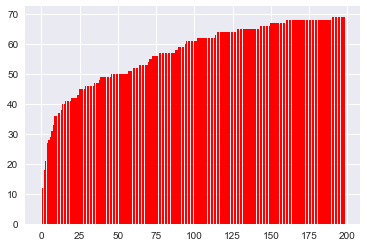

In [106]:
ll = []
for i in range(1,200):
        ll.append(len(set1[set1['counts'] < i]))
ll = pd.Series(ll)
plt.bar(ll.index, ll, color = 'red')

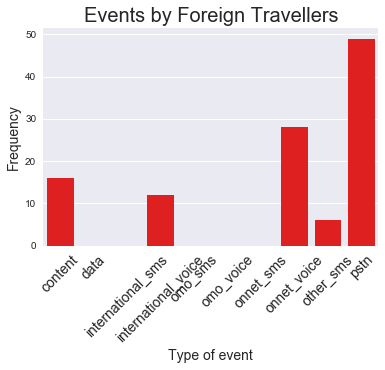

In [174]:
ec = sns.countplot(x='event_sub', data = dfn.drop_duplicates(['hash_number_A'], keep = 'first'), color = 'red' )
plt.title("Events by Foreign Travellers", size = 20)
plt.xlabel('Type of event', size = 14)
plt.ylabel('Frequency', size = 14)
ec.set_xticklabels(ec.get_xticklabels(), rotation=45, size = 14)

In [22]:
ARPU =pd.DataFrame(df.groupby('hash_number_A')['cost'].sum())
ARPU['dd'] = ARPU.ix
ARPU['cost1'] = ARPU1['cost']
ARPU

NotImplementedError: ix is not iterable

In [1]:
ec = sns.countplot(x=df['event_sub'].unique(), data = df.groupby('event_sub').value_counts('hash_number_A'), color = 'blue' )
plt.title("Events by All Customers", size = 20)
plt.xlabel('Type of event', size = 14)
plt.ylabel('Frequency', size = 14)
ec.set_xticklabels(ec.get_xticklabels(), rotation=45, size = 14)

NameError: name 'sns' is not defined

In [135]:
ARPU1 =pd.DataFrame(dfn.groupby('hash_number_A')['cost'].sum())
ARPU1.head()
dfn.head()

,hash_number_A,hash_tariff,event,event_sub,network_service_direction,event_start_date,LAT,LON,cost,hash_number_B,...,data_volume_mb,hash_accum_code,device_type,phone_price_category,interest_1,interest_2,interest_3,interest_4,interest_5,time
14326,2516168,232510,network_ser,other_sms,Incoming,08AUG17:15:52:59,48.941944,24.745277,0.000000,95284,...,0.0,0,phone,1,NaN,NaN,NaN,NaN,NaN,2017-08-08 15:52:59
14348,1799844,232510,network_ser,international_voice,Outgoing,26AUG17:15:07:12,48.341667,24.532778,5.999800,96120,...,0.0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-26 15:07:12
14349,1799844,232510,network_ser,international_voice,Outgoing,26AUG17:15:00:56,48.351944,24.552500,2.999900,96120,...,0.0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-26 15:00:56
14350,1799844,232510,network_ser,international_voice,Outgoing,24AUG17:19:09:22,48.902500,24.669167,17.999399,96120,...,0.0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-24 19:09:22
14351,1799844,232510,network_ser,international_voice,Outgoing,23AUG17:22:15:14,48.902500,24.669167,8.999700,96120,...,0.0,0,smartphone,2,NaN,NaN,NaN,NaN,NaN,2017-08-23 22:15:14


In [137]:
dfn['cost'] = dfn.cost.astype('int32')

NameError: name 'color' is not defined

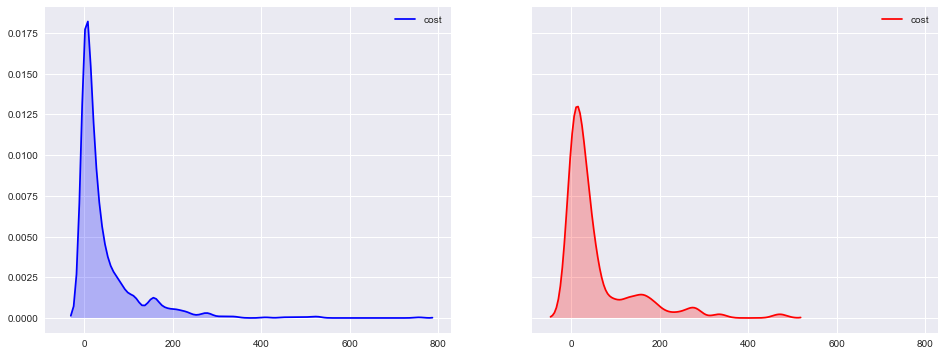

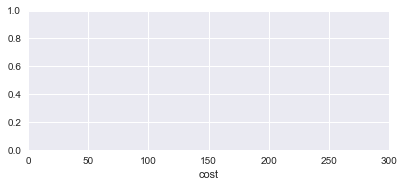

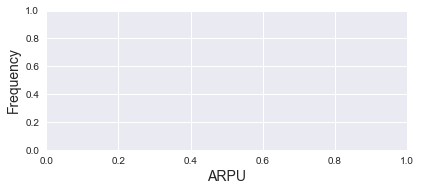

In [176]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize = (16, 6), sharex = True, sharey = True)
plt.title("ARPU of the Foreign Travellers", size = 20, ax = axes[0])
plt.title("ARPU of All the Customers", size = 20, ax = axes[1])
facet = sns.FacetGrid(ARPU,aspect=2)
facet1 = sns.FacetGrid(ARPU1,aspect=2)
facet.map(sns.kdeplot, 'cost',shade= True, color = 'blue', ax = axes[0])
facet1.map(sns.kdeplot, 'cost',shade= True, color = 'red', ax = axes[1])
#facet1.set(xlim=(0, 300))
facet.set(xlim=(0, 300))
plt.xlabel('ARPU', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(loc='upper center', hue = color)

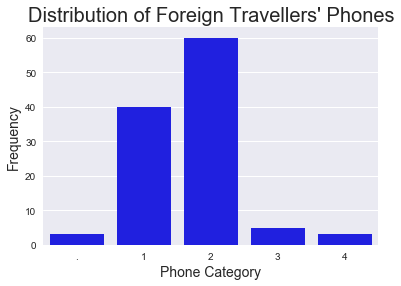

In [110]:
ec = sns.countplot(x='phone_price_category', data = dfn.drop_duplicates(['hash_number_A'], keep = 'first'), color = 'blue' )
plt.title("Distribution of Foreign Travellers' Phones", size = 20)
plt.xlabel('Phone Category', size = 14)
plt.ylabel('Frequency', size = 14)

In [63]:
len(dfn.drop_duplicates(['hash_number_A'], keep = 'first'))

111

In [288]:
dfn = df[df['hash_number_A'].isin(set2.index.tolist())]

In [297]:
#SUPERB CODE
lat1 = []
lon1 = []
for i in dfn['hash_number_A'].unique():
    df_temp = dfn[dfn['hash_number_A'] == i]
    lat = df_temp['LAT'].mean()
    lon = df_temp['LON'].mean()
    lat1.append(lat)
    lon1.append(lon)

In [290]:
len(lat1)

10

In [102]:
len(dfn['hash_number_A'].unique())

111

In [291]:
gmap = gmplot.GoogleMapPlotter(lat[0],lon[0],18)
gmap.scatter(lat1,lon1, 'r', 0.1, marker=False)
gmap.draw('map_target.html')

TypeError: 'float' object is not subscriptable

In [298]:
#latitudes1 = dfn['LAT'].tolist()
#longitudes1 = dfn['LON'].tolist()

import gmplot

#gmap = gmplot.GoogleMapPlotter(location.latitude, location.longitude, 5)
gmap = gmplot.GoogleMapPlotter(latitudes1[0],longitudes1[0], 10)
#gmap.scatter(lat1, lon1, 'r', 1000, marker=False)
gmap.scatter(lat1, lon1, 'r', 1000, marker=False)
#gmap.heatmap(latitudes1, longitudes1)

#gmap.heatmap(lat1, lon1)
gmap.draw(htmlfile= 'mymap_fin.html')

In [ ]:
#Date of week
datetime.datetime.today()
datetime.datetime(2012, 3, 23, 23, 24, 55, 173504)
datetime.datetime.today().weekday()

In [16]:
univ = ['ЛНУ', 'Національний університет "Львівська політехніка"']

In [17]:
from geopy.geocoders import Nominatim
univ1 = []
for i in univ:
    location = geolocator.geocode([i])
    df_coord = df_coord.append({'Name': i, 'LAT': location.latitude, 'LON': location.longitude}, ignore_index=True)
    univ1.append([location.latitude, location.longitude])
print(univ1)

NameError: name 'geolocator' is not defined

In [180]:
df['hash_number_A'].groupby(df['hash_number_A'].unique()).sum()

ValueError: Categorical dtype grouper must have len(grouper) == len(data)

In [195]:
111/len(df['hash_number_A'].unique())*100

11.291963377416073

In [205]:
ARPU.head()

,cost
hash_number_A,
171195,120.973999
171637,113.500000
171902,0.000000
172162,266.487701
172183,3.499900


In [206]:
a1 = ARPU['cost'].sum()/len(df['hash_number_A'].unique())
a2 = ARPU1['cost'].sum()/111

In [207]:
a1, a2

(45.137708227365209, 56.016144073761261)

In [222]:
plt.bar(x=[a1, a2], y=[1,2], color =['blue', 'red'])
#plt.bar(a2, 'Міжнародні мандрівники', color = 'red')
plt.ylabel('ARPU, ₴') 
#['Всі клієнти', 'Міжнародні мандрівники']

TypeError: bar() missing 2 required positional arguments: 'left' and 'height'

In [221]:
ARPU1['cost'].sum()/111

56.016144073761261

In [292]:
10/983

0.01017293997965412